In [1]:
import os
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Открываем собранный датасет
data = pd.read_parquet(os.path.join("..", "data", "parquet", "companies_feat_1.parquet"))

In [4]:
# Избавляемся от NaNs
data = data.dropna()
data.drop(data.loc[data["Основной вид деятельности"] == "na"].index, inplace=True)
data.drop(data.loc[data["Основной вид деятельности"] == "No"].index, inplace=True)

# Изменяем некоторые колонки для удобства
data["Основной вид деятельности"] = data.apply(
    lambda row: row["Основной вид деятельности"][1:2]
    if row["Основной вид деятельности"][0] == "0"
    else row["Основной вид деятельности"][:2],
    axis=1,
)
data["Регион"] = data.apply(
    lambda row: row["Регион"][1:2] if row["Регион"][0] == "0" else row["Регион"][:2],
    axis=1,
)

# Поменяем тип данных
data[["Основной вид деятельности", "Регион"]] = data[
    ["Основной вид деятельности", "Регион"]
].astype(int)
data["Вновь созданный"] = (data["Вновь созданный"] == "Да").astype(int)
data["Наличие лицензий"] = (data["Наличие лицензий"] == "Да").astype(int)
data["КатСубМСП"] = data["КатСубМСП"].astype(int)

/tmp/ipykernel_317145/4187071192.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[data["Основной вид деятельности"] == "na"].index, inplace=True)
/tmp/ipykernel_317145/4187071192.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data.loc[data["Основной вид деятельности"] == "No"].index, inplace=True)
/tmp/ipykernel_317145/4187071192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [5]:
# Признаки делятся на 2 типа - признаки компании и признаки региона
data.keys()

Index(['Тип субъекта', 'Наименование / ФИО', 'Основной вид деятельности',
       'Регион', 'Вновь созданный', 'Наличие лицензий', 'ОГРН', 'ИНН',
       'reg_date', 'lifetime', '16.5.', '16.11.', '16.12.', '19.13.',
       '14.3.2.', '14.4.2.', '15.2.', '1.1.', '1.3.', '1.5.', '1.6.2.',
       '1.10.', '1.19.', '1.20.', '3.1.1.', '3.1.2.', '3.2.', '3.8.2.', '3.9.',
       '3.15.', '3.17.', '3.28.', '11.1.', '11.3.', '11.4.', '11.5.1',
       '11.5.2.', '9.3.', '2.1.', '2.2.', '2.3.', '2.4.', '2.5.', '2.10.1.',
       '5.2.', '20.4.', '20.5.', '20.13.', '4.12.', '4.16.', '4.21.',
       'КатСубМСП', 'ССЧР'],
      dtype='object')

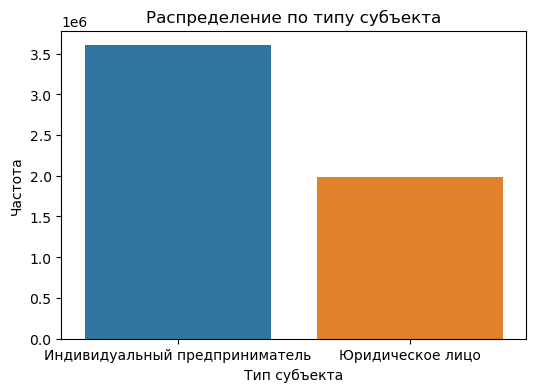

In [5]:
# Посмотрим распределение Типов Субъекта
plt.figure(figsize=(6, 4))
sns.countplot(x="Тип субъекта", data=data)
plt.title("Распределение по типу субъекта")
plt.xlabel("Тип субъекта")
plt.ylabel("Частота")
plt.show()

data["Тип субъекта"] = (
    data["Тип субъекта"] == "Индивидуальный предприниматель"
).astype(int)

count                          5625521
mean     2014-12-25 12:08:56.083468032
min                2002-07-01 00:00:00
25%                2012-08-10 00:00:00
50%                2016-08-10 00:00:00
75%                2018-07-10 00:00:00
max                2023-02-10 00:00:00
Name: reg_date, dtype: object


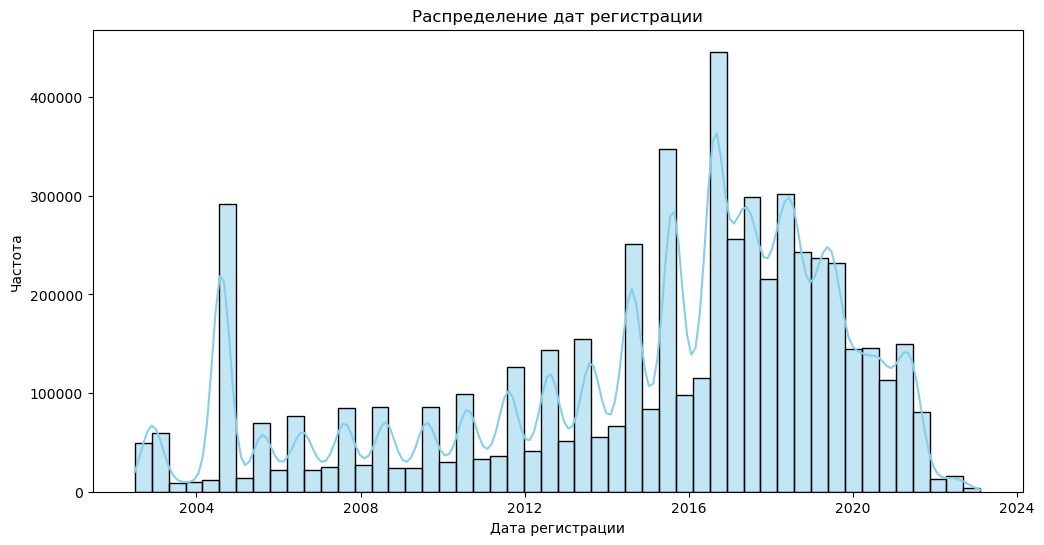

In [6]:
# Посмотрим распределение времени регистрации компаний
print(data.reg_date.describe())
plt.figure(figsize=(12, 6))
sns.histplot(data["reg_date"], kde=True, bins=50, color="skyblue")
plt.title("Распределение дат регистрации")
plt.xlabel("Дата регистрации")
plt.ylabel("Частота")
plt.show()

count    5625521.00
mean          60.63
std           56.91
min            1.00
25%           17.00
50%           38.00
75%           88.00
max          248.00
Name: lifetime, dtype: float64


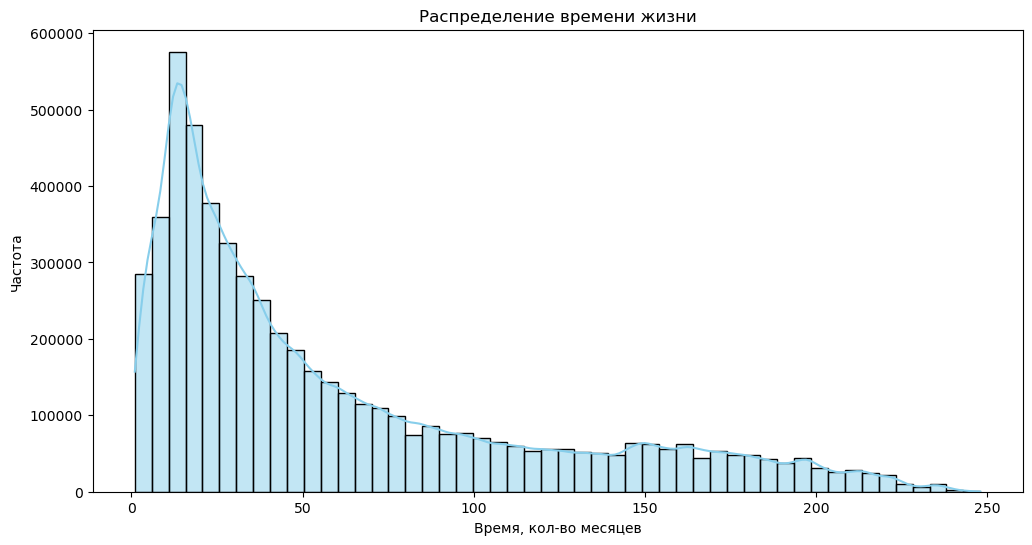

In [7]:
# Посмотрим распределение времени жизни компаний
print(data["lifetime"].describe().round(2))
plt.figure(figsize=(12, 6))
sns.histplot(data["lifetime"], kde=True, bins=50, color="skyblue")
plt.title("Распределение времени жизни")
plt.xlabel("Время, кол-во месяцев")
plt.ylabel("Частота")
plt.show()

Text(0.5, 1.0, 'Время жизни компании')

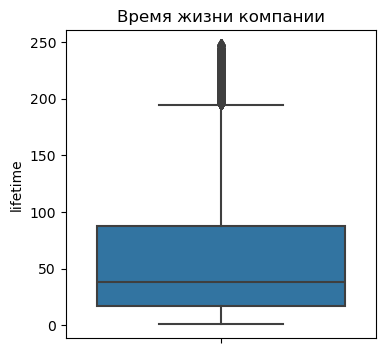

In [8]:
# Боксплот
plt.figure(figsize=(4, 4))
sns.boxplot(y=data["lifetime"])
plt.title("Время жизни компании")

In [13]:
data.replace(to_replace='Индивидуальный предприниматель', value=0).replace(to_replace='Юридическое лицо', value=1)

,Тип субъекта,Наименование / ФИО,Основной вид деятельности,Регион,Вновь созданный,Наличие лицензий,ОГРН,ИНН,reg_date,lifetime,...,2.10.1.,5.2.,20.4.,20.5.,20.13.,4.12.,4.16.,4.21.,КатСубМСП,ССЧР
5,0,КЕРИМОВ ЭЛСЕВАР САМЕД ОГЛЫ,47,56,1,0,323565800002186,561412256340,2023-02-10,1.0,...,4.700000,131.236140,111.900000,109.400000,108.500000,2.200000,9.400000,8.000000,1,1.0
19,0,СЫРОВАТСКИЙ АРТЕМ АНДРЕЕВИЧ,46,66,0,0,320665800061081,665912974734,2023-02-10,1.0,...,4.100000,111.626093,108.700000,109.800000,112.100000,3.900000,20.700000,23.400000,1,1.0
25,0,АНДРЕЕВ АНДРЕЙ ВИКТОРОВИЧ,47,50,1,0,323508100047470,504204183392,2023-02-10,1.0,...,3.400000,138.782008,110.600000,112.100000,107.400000,5.500000,19.900000,15.100000,1,1.0
28,0,СКРЯБИНА ОЛЬГА ВИКТОРОВНА,47,66,0,0,317665800225368,665905009194,2023-02-10,1.0,...,4.100000,111.626093,108.700000,109.800000,112.100000,3.900000,20.700000,23.400000,1,1.0
31,0,ГОРБУНОВ ИЛЬЯ СЕРГЕЕВИЧ,71,77,0,0,318774600061928,352534590977,2023-02-10,1.0,...,2.600000,157.451290,109.000000,106.800000,114.900000,4.900000,33.300000,157.700000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6460355,Юридическое лицо,ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ЧАСТН...,80,60,0,0,1026000953274,6027071112,2002-07-02,213.0,...,7.355556,96.441265,109.972222,107.233333,112.333333,2.819000,2.455556,3.500000,2,1.0
6460356,Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""Д-ЮРЕ""",69,77,0,0,1027700000459,7701202047,2002-07-02,230.0,...,1.535000,120.471117,109.140000,107.160000,110.870000,14.042900,30.914650,210.535000,1,1.0
6460357,Юридическое лицо,ЗАКРЫТОЕ АКЦИОНЕРНОЕ ОБЩЕСТВО МЕДИЦИНСКИЙ ОФТА...,86,77,0,0,1027700000371,7703147070,2002-07-02,233.0,...,1.535000,120.471117,109.140000,107.160000,110.870000,14.042900,30.914650,210.535000,2,1.0
6460358,Юридическое лицо,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ИНФО...",70,77,0,0,1027700000316,7719160623,2002-07-02,194.0,...,1.500000,115.013184,110.011765,107.682353,112.141176,15.870588,31.241176,216.270588,1,1.0


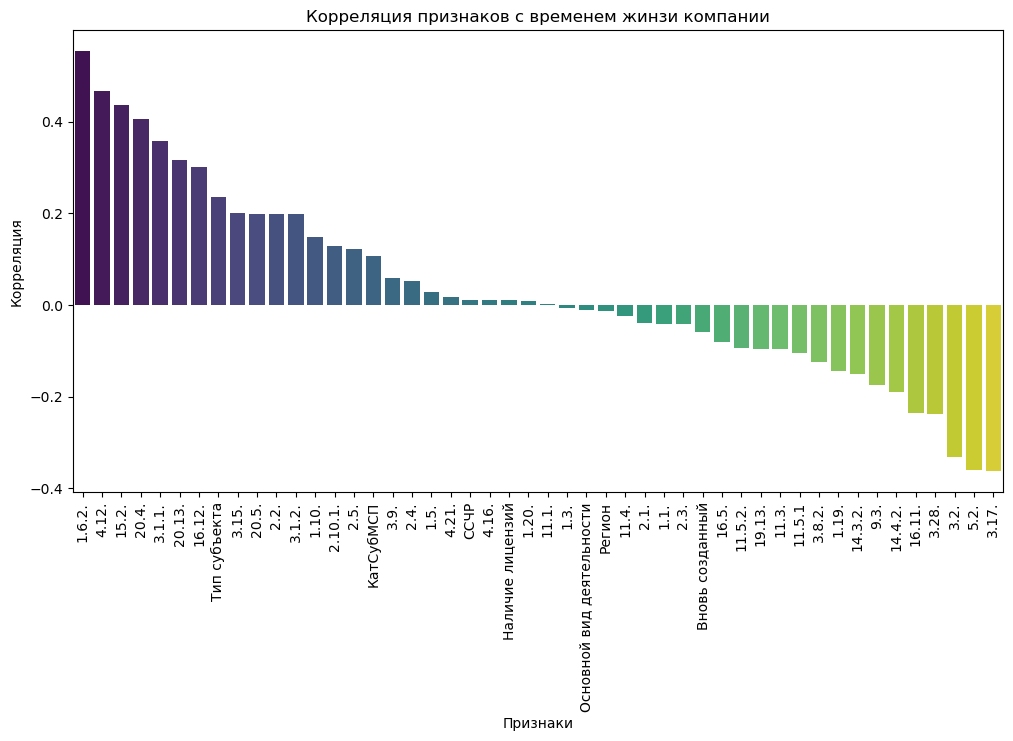

In [14]:
# Корреляции
correlation_results = data.drop(
    ["Наименование / ФИО", "ОГРН", "ИНН", "reg_date", ], axis=1
).replace(to_replace='Индивидуальный предприниматель', value=0).replace(to_replace='Юридическое лицо', value=1).corrwith(data.lifetime)
sorted_correlation_results = correlation_results.sort_values(ascending=False)
sorted_correlation_results.drop("lifetime", inplace=True)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=sorted_correlation_results.index,
    y=sorted_correlation_results.values,
    palette="viridis",
)
plt.title("Корреляция признаков с временем жизни компании")
plt.xlabel("Признаки")
plt.ylabel("Корреляция")
plt.xticks(rotation=90)
plt.show()

In [15]:
# Зависимость от "Тип субъекта"

data["lifetime"].groupby(data["Тип субъекта"]).mean()

Тип субъекта
Индивидуальный предприниматель    50.698683
Юридическое лицо                  78.737243
Name: lifetime, dtype: float64

In [16]:
dependency_df = (
    (data["lifetime"].groupby(data["Основной вид деятельности"]).mean())
    .sort_values()
    .to_frame()
)
dependency_df["Количество компаний"] = (
    data.groupby("Основной вид деятельности").size().loc[dependency_df.index].values
)
dependency_df

,lifetime,Количество компаний
Основной вид деятельности,,
39,28.807453,161
98,36.410000,100
53,37.510019,8584
12,39.054545,220
55,39.398792,35417
...,...,...
6,97.483083,532
58,98.973036,9457
21,99.751009,743


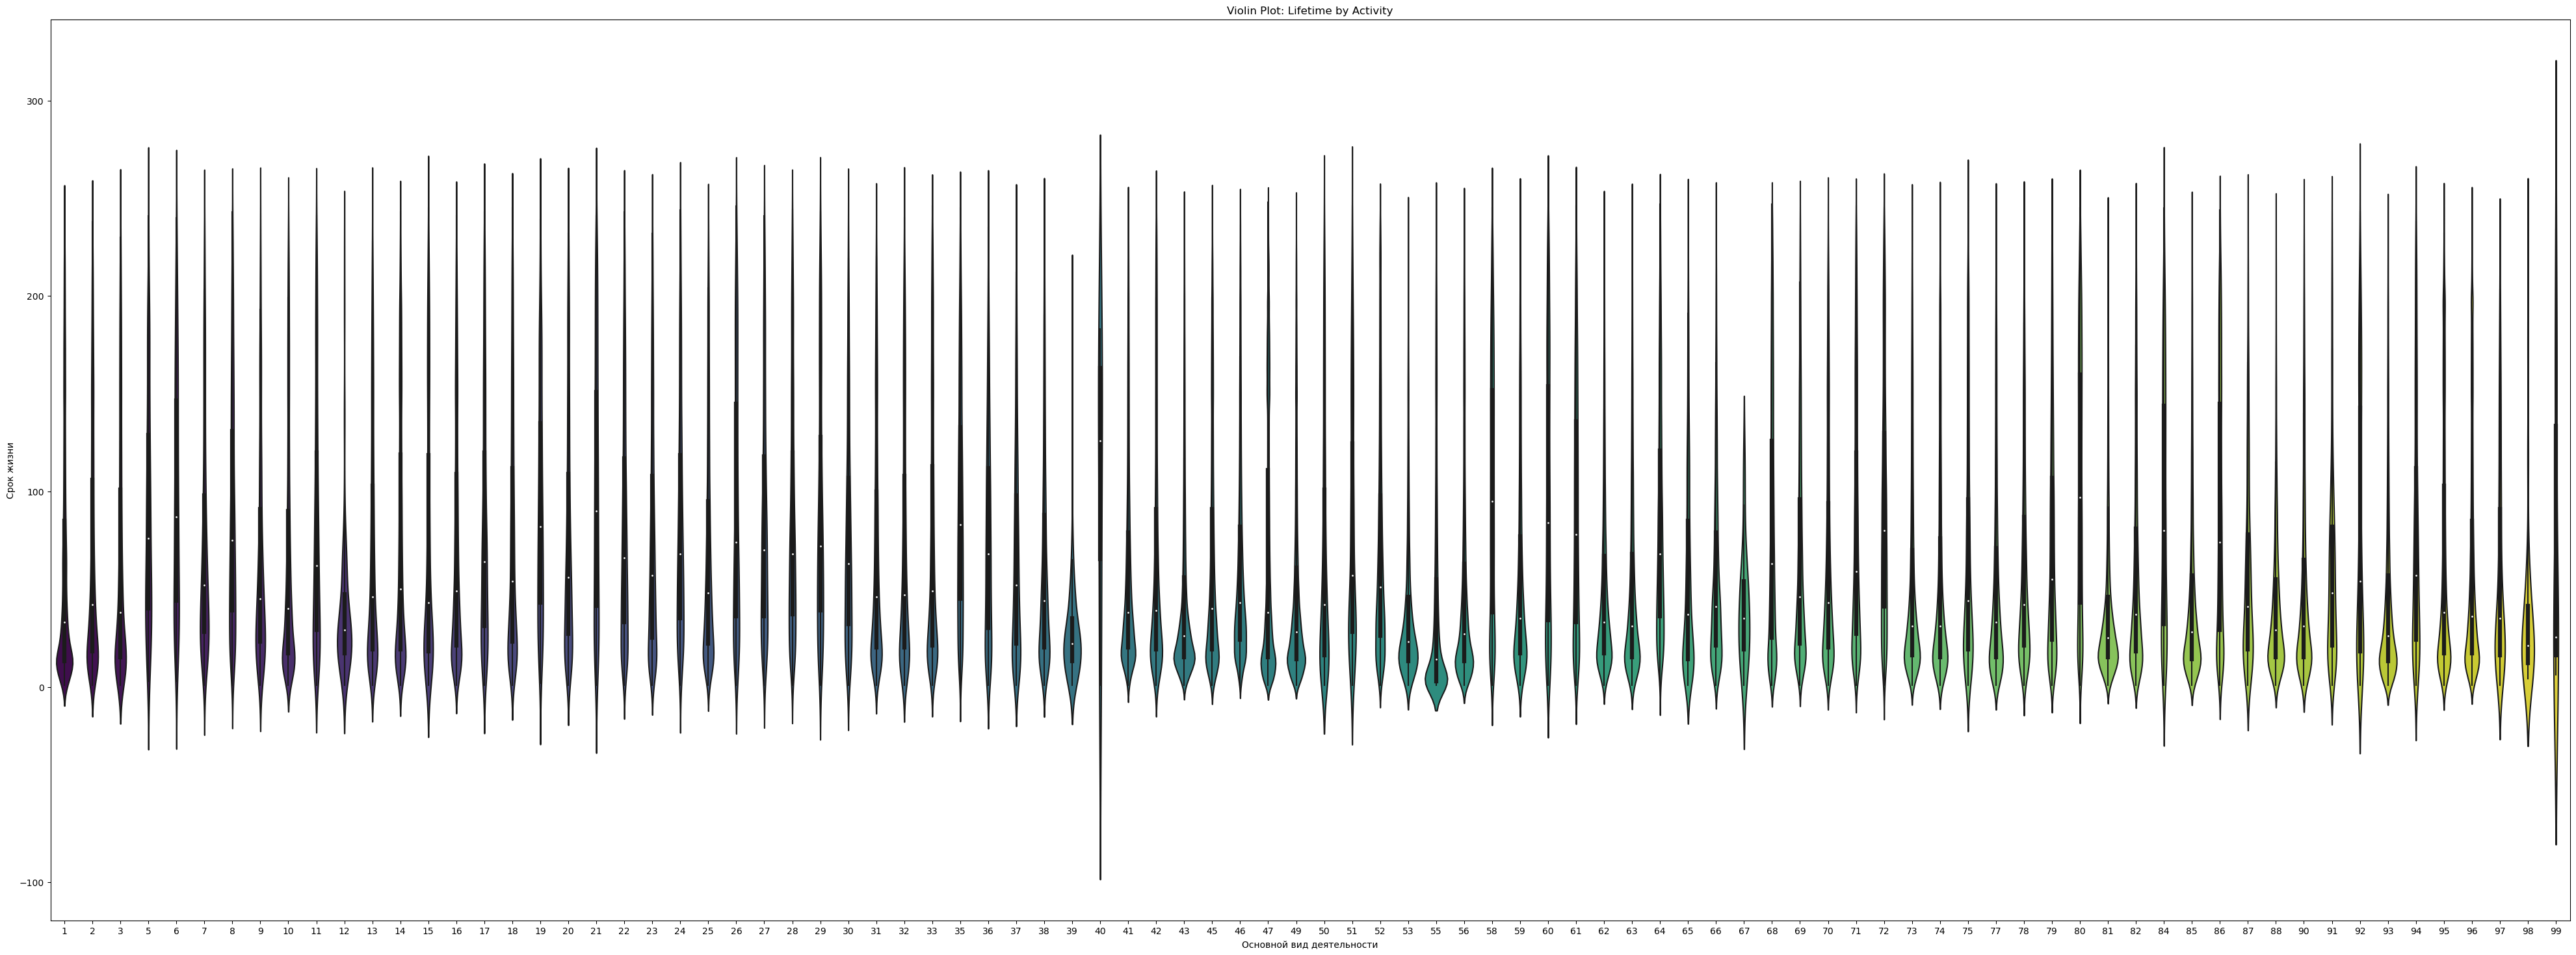

In [17]:
plt.figure(figsize=(50, 18))
sns.violinplot(
    x="Основной вид деятельности", y="lifetime", data=data, palette="viridis"
)
plt.title("Violin Plot: Lifetime by Activity")
plt.xlabel("Основной вид деятельности")
plt.ylabel("Срок жизни")
plt.show()

In [78]:

# np.linspace(mdates.date2num(data[col]).min(), mdates.date2num(data[col]).max(), 8)
labels_t = pd.date_range(start=data[col].min(),end=data[col].max(),periods=8)
labels_t = ["-".join([str(labels_t[i].year), str(labels_t[i].month), str(labels_t[i].day)]) for i in range(len(labels_t))]

In [79]:
# labels_t[0].to_pydatetime()#.dt.to_period('M')
labels_t

['2002-7-1',
 '2005-6-10',
 '2008-5-21',
 '2011-5-1',
 '2014-4-11',
 '2017-3-21',
 '2020-3-1',
 '2023-2-10']

<Figure size 1000x800 with 0 Axes>

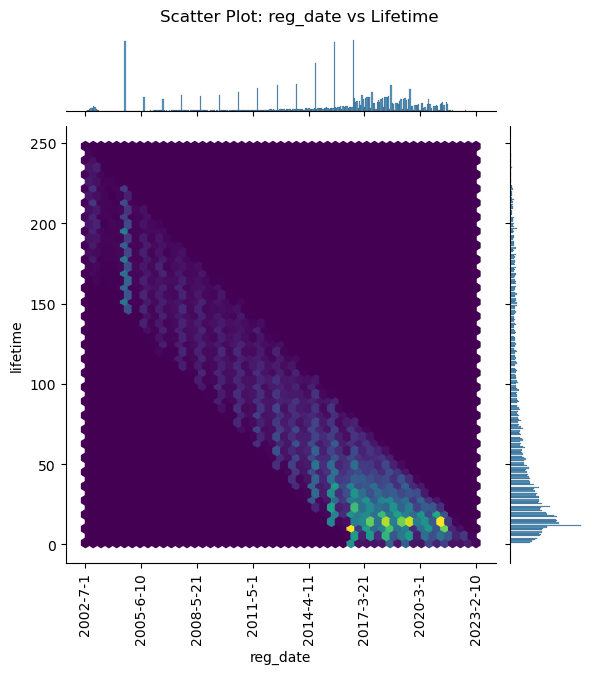

In [81]:
import matplotlib.dates as mdates

# Зависимость от даты регистрации компании
col = "reg_date"

plt.figure(figsize=(10, 8))
data_numeric = data.copy()
data_numeric[col] = mdates.date2num(data[col])
sns.jointplot(x=col, y="lifetime", data=data_numeric, kind="hex", cmap="viridis")
plt.suptitle(f"Scatter Plot: {col} vs Lifetime", y=1.02)
labels_t = pd.date_range(start=data[col].min(),end=data[col].max(),periods=8)
labels_t = ["-".join([str(labels_t[i].year), str(labels_t[i].month), str(labels_t[i].day)]) for i in range(len(labels_t))]
plt.xticks(ticks=np.linspace(mdates.date2num(data[col]).min(), mdates.date2num(data[col]).max(), 8), labels=labels_t, rotation=90)
# plt.xticks_

plt.show()

In [19]:
# Dependency of "Тип субъекта"

dependency_df2 = (
    (data["lifetime"].groupby(data["Регион"]).mean()).sort_values().to_frame()
)
dependency_df2["Количество компаний"] = (
    data.groupby("Регион").size().loc[dependency_df2.index].values
)
dependency_df2

,lifetime,Количество компаний
Регион,,
6,32.267650,7323
91,33.458240,79334
20,40.355378,25373
92,40.846141,18322
5,44.812382,51978
...,...,...
41,71.372140,13417
51,72.486791,24339
11,73.418520,28369
